<a href="https://colab.research.google.com/github/nagamani0604/Nagamani_INFO5731_Fall2024/blob/main/Somireddy_Nagamani_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:

file_path = '/content/papers_abstracts.csv'

def load_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        dataset = [line.strip() for line in file if line.strip()]
    return dataset

def preprocess(text):
    return text.lower().split()

def count_trigrams(dataset):
    trigram_counts = {}
    for text in dataset:
        words = preprocess(text)
        # Generate trigrams
        for i in range(len(words) - 2):
            trigram = (words[i], words[i+1], words[i+2])
            trigram_counts[trigram] = trigram_counts.get(trigram, 0) + 1
    return trigram_counts


def count_bigrams(dataset):
    bigram_counts = {}
    unigram_counts = {}
    for text in dataset:
        words = preprocess(text)
        for i in range(len(words) - 1):
            bigram = (words[i], words[i+1])
            bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1
            unigram_counts[words[i]] = unigram_counts.get(words[i], 0) + 1
        unigram_counts[words[-1]] = unigram_counts.get(words[-1], 0) + 1


    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        word1, word2 = bigram
        bigram_probabilities[bigram] = count / unigram_counts[word1]

    return bigram_probabilities


def extract_noun_phrases(text):
    words = preprocess(text)
    noun_phrases = []
    for i in range(len(words) - 1):
        noun_phrases.append(f"{words[i]} {words[i+1]}")
    return noun_phrases

def calculate_relative_probabilities(dataset):
    noun_phrase_counts = {}
    for text in dataset:
        noun_phrases = extract_noun_phrases(text)
        for phrase in noun_phrases:
            noun_phrase_counts[phrase] = noun_phrase_counts.get(phrase, 0) + 1

    max_frequency = max(noun_phrase_counts.values())

    relative_probabilities = []
    for text in dataset:
        review_counts = {}
        noun_phrases = extract_noun_phrases(text)
        for phrase in noun_phrases:
            review_counts[phrase] = review_counts.get(phrase, 0) + 1

        row = {}
        for phrase in noun_phrase_counts:
            row[phrase] = review_counts.get(phrase, 0) / max_frequency
        relative_probabilities.append(row)

    return relative_probabilities, noun_phrase_counts.keys()

dataset = load_dataset(file_path)

# Step 1: Count Trigrams
trigram_counts = count_trigrams(dataset)
print("Trigram Counts:")
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")

# Step 2: Bigram Probabilities
bigram_probabilities = count_bigrams(dataset)
print("\nBigram Probabilities:")
for bigram, prob in bigram_probabilities.items():
    print(f"{bigram}: {prob:.2f}")

# Step 3: Relative Probabilities of Noun Phrases
relative_probabilities, noun_phrases = calculate_relative_probabilities(dataset)

# Display results in table form
print("\nRelative Probabilities Table (Rows=Reviews, Columns=Noun Phrases):")
print("Review\t", "\t".join(noun_phrases))
for i, row in enumerate(relative_probabilities):
    print(f"Review {i+1}", end="\t")
    for phrase in noun_phrases:
        print(f"{row[phrase]:.2f}", end="\t")
    print()


Streaming output truncated to the last 5000 lines.
('thus,', 'even'): 0.01
('set', 'augmentation'): 0.00
('augmentation', 'we'): 0.02
('are', 'improving'): 0.00
('the', '6.67%'): 0.00
('6.67%', 'error'): 1.00
('error', 'obtained'): 0.01
('best', 'googlenet'): 0.00
('googlenet', 'architecture'): 0.20
('architecture', '(7'): 0.00
('(7', 'models,'): 0.50
('models,', '144'): 0.00
('144', 'crops)."'): 0.50
('deep', 'rewiring:'): 0.00
('rewiring:', 'training'): 1.00
('sparse', 'deep'): 0.01
('deep', 'networks,"neuromorphic'): 0.00
('networks,"neuromorphic', 'hardware'): 1.00
('hardware', 'tends'): 0.01
('pose', 'limits'): 0.02
('them.', 'but'): 0.01
('also', 'generic'): 0.00
('generic', 'hardware'): 0.01
('learning', 'run'): 0.00
('run', 'more'): 0.02
('efficiently', 'for'): 0.01
('methods', 'exist'): 0.00
('pruning', 'connections'): 0.08
('network', 'after'): 0.00
('without', 'connectivity'): 0.00
('connectivity', 'constraints.'): 0.06
('constraints.', 'we'): 0.07
('deep', 'r,'): 0.00
('r,'

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [27]:
# Write your code here

import math

file_path = '/content/papers_abstracts.csv'

def load_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        dataset = [line.strip() for line in file if line.strip()]
    return dataset

def preprocess(text):
    return text.lower().split()

def compute_tf_idf(dataset):
    term_frequencies = []
    document_frequencies = {}
    total_documents = len(dataset)

    for text in dataset:
        words = preprocess(text)
        tf = {}
        for word in words:
            tf[word] = tf.get(word, 0) + 1
        term_frequencies.append(tf)

        for word in set(words):
            document_frequencies[word] = document_frequencies.get(word, 0) + 1

    idf = {word: math.log(total_documents / (df + 1)) for word, df in document_frequencies.items()}

    tf_idf_matrix = []
    for tf in term_frequencies:
        tf_idf = {word: (freq * idf[word]) for word, freq in tf.items()}
        tf_idf_matrix.append(tf_idf)

    return tf_idf_matrix, idf

def cosine_similarity(query_vector, document_vector):
    dot_product = 0.0
    query_magnitude = 0.0
    document_magnitude = 0.0

    for word, query_weight in query_vector.items():
        document_weight = document_vector.get(word, 0.0)
        dot_product += query_weight * document_weight
        query_magnitude += query_weight ** 2
    for weight in document_vector.values():
        document_magnitude += weight ** 2

    if query_magnitude == 0 or document_magnitude == 0:
        return 0.0
    return dot_product / (math.sqrt(query_magnitude) * math.sqrt(document_magnitude))

def rank_documents(query, tf_idf_matrix, idf):
    query_words = preprocess(query)
    query_tf = {}
    for word in query_words:
        query_tf[word] = query_tf.get(word, 0) + 1

    query_tf_idf = {word: (freq * idf.get(word, 0.0)) for word, freq in query_tf.items()}

    scores = []
    for i, document_tf_idf in enumerate(tf_idf_matrix):
        score = cosine_similarity(query_tf_idf, document_tf_idf)
        scores.append((i, score))

    scores.sort(key=lambda x: x[1], reverse=True)
    return scores

dataset = load_dataset(file_path)
query = "An outstanding movie with a haunting performance and best character development"  # Replace with your own query

tf_idf_matrix, idf = compute_tf_idf(dataset)

ranked_documents = rank_documents(query, tf_idf_matrix, idf)

print("Ranked Documents (index and score):")
for doc_index, score in ranked_documents:
    print(f"Document {doc_index + 1}: {score:.4f}")






Streaming output truncated to the last 5000 lines.
Document 11012: 0.0022
Document 2634: 0.0022
Document 3841: 0.0022
Document 828: 0.0022
Document 1916: 0.0022
Document 3150: 0.0022
Document 4373: 0.0022
Document 5366: 0.0022
Document 6539: 0.0022
Document 532: 0.0022
Document 1625: 0.0022
Document 2401: 0.0022
Document 3609: 0.0022
Document 168: 0.0022
Document 1259: 0.0022
Document 2827: 0.0022
Document 4036: 0.0022
Document 2457: 0.0022
Document 3665: 0.0022
Document 11093: 0.0022
Document 11096: 0.0022
Document 2790: 0.0022
Document 9552: 0.0022
Document 10658: 0.0022
Document 3257: 0.0022
Document 4485: 0.0022
Document 4956: 0.0022
Document 6132: 0.0022
Document 9948: 0.0022
Document 11053: 0.0022
Document 265: 0.0022
Document 1354: 0.0022
Document 5518: 0.0022
Document 6691: 0.0022
Document 10159: 0.0022
Document 11265: 0.0022
Document 2620: 0.0022
Document 3827: 0.0022
Document 2531: 0.0022
Document 3739: 0.0022
Document 7416: 0.0022
Document 8500: 0.0022
Document 9554: 0.0022


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

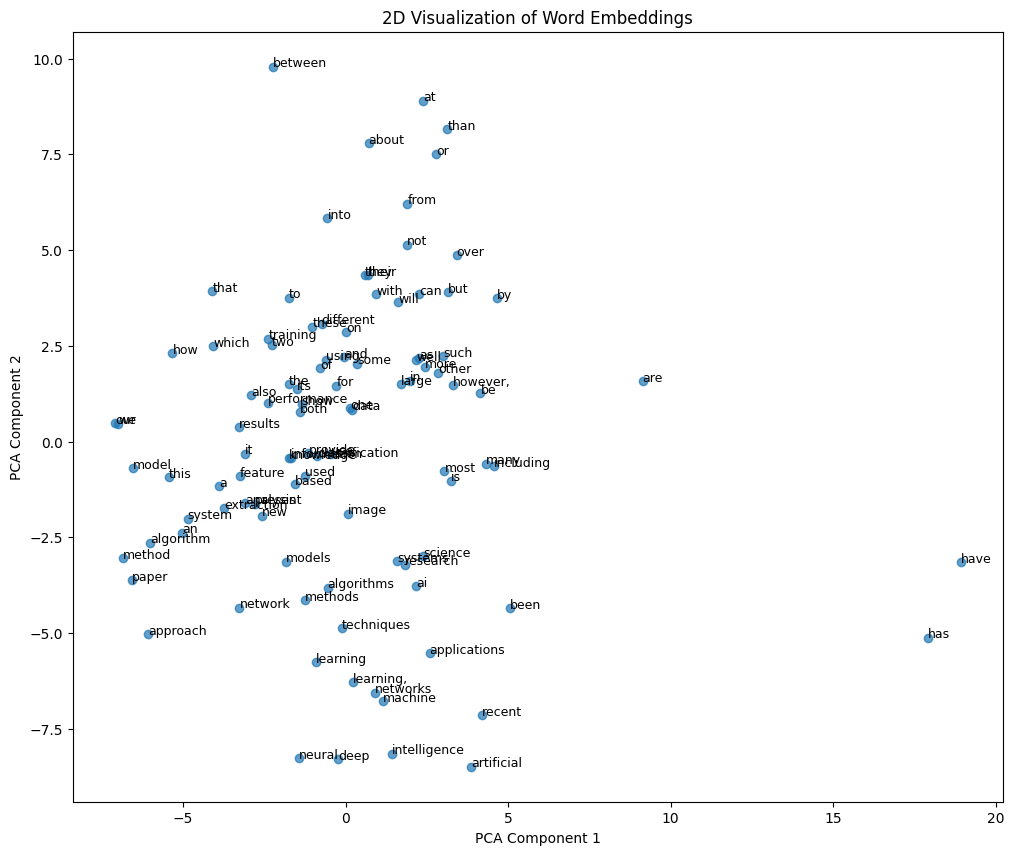

In [26]:
# Write your code here

from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

file_path = '/content/papers_abstracts.csv'

def load_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        dataset = [line.strip() for line in file if line.strip()]
    return dataset

def preprocess(text):
    return text.lower().split()

def train_word2vec(dataset, embedding_dim=300):
    tokenized_sentences = [preprocess(text) for text in dataset]

    model = Word2Vec(sentences=tokenized_sentences, vector_size=embedding_dim, window=5, min_count=1, workers=4)

    return model

def visualize_embeddings(model):
    words = list(model.wv.index_to_key)[:100]
    embeddings = np.array([model.wv[word] for word in words])

    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(12, 10))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9)
    plt.title("2D Visualization of Word Embeddings")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

dataset = load_dataset(file_path)

embedding_dim = 300
word2vec_model = train_word2vec(dataset, embedding_dim)

visualize_embeddings(word2vec_model)







## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [25]:
# The GitHub link of your final csv file

https://github.com/nagamani0604/Nagamani_INFO5731_Fall2024/blob/main/sentiment_data.csv






# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer

Difficulty i faced is accurately annotating each document's sentiment.
It can be subjective and may need to be adjusted to find keywords that consistently convey the sentiment in various contexts (e.g., differentiating between neutral and positive statements in research abstracts).

To find patterns and trends, I would like to examine and analyze the text data.
The task's relevance to the real world would be interesting to me.
Since sentiment analysis is a commonly used technique in domains such as opinion mining, market research, and customer feedback analysis, completing this assignment offers hands-on experience.
Practical coding and data analysis tasks are well-balanced in this assignment.